<a href="https://colab.research.google.com/github/ztjohnson23/MAT494/blob/main/hw_2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

2.4.1 MLE for Random Samples

In [ ]:
# Poisson distribution with unknown lambda
lam = np.random.randint(-10,21)
x = np.random.poisson(lam,1000)

$$f(x;λ)=\frac{λ^xe^{-\lambda}}{x!}$$
$$\ln(f(x_1,...,x_n;\lambda))=-\lambda n-\sum_{i=1}^n \ln(x_i!)+\ln(\lambda)\sum_{i=1}^n x_i$$
$$\frac{\delta}{\delta \lambda}=-n-0+\frac{1}{λ}\sum_{i=1}^n x_i=0 $$
$$\hat{\lambda}=\frac{1}{n}\sum_{i=1}^n x_i=\bar{x}$$


In [ ]:
# Calculate MLE
lhat = sum(x)/len(x)
print(f'Lambda is {lam}.\nMLE of lambda is {lhat}.')

Lambda is 11.
MLE of lambda is 10.999.


We can see that the MLE of the parameter lambda is an accurate estimatation. Without knowing lambda, we were able to predict it within 0.001 using MLE.

2.4.2 Linear Regression

In [ ]:
x = [13, 11, 10, 8, 9, 6, 3, 0, 0]
y = [10, 16, 18, 24, 23, 23, 25, 26, 28]

# Calculate B's by MLE
xi, yi, B0, B1 = sym.symbols('xi yi B0 B1')
f = (yi-B0-B1*xi)**2

# Partial derivatives with respect to unknowns
db0 = sym.diff(f,B0)
print(f'0 = sum({db0})')
db1 = sym.diff(f,B1)
print(f'0 = sum({db1})')

0 = sum(2*B0 + 2*B1*xi - 2*yi)
0 = sum(-2*xi*(-B0 - B1*xi + yi))


$$\delta\beta_0=\sum_{i=1}^n{2\beta_0-2\beta_1x_i-2y_i}=0$$
$$\delta\beta_1=\sum_{i=1}^n{2\beta_0x_i+2\beta_1x_i^2-2x_iy_i}=0$$

In [39]:
# Set up and solve system of equations
db0_new = 2*B0*len(y)+2*B1*sum(x)-2*sum(y)
print(f'0 = {db0_new}')

x2 = [xi*xi for xi in x]
xy = []
for i in range(len(x)):
  xy.append(x[i]*y[i])

db1_new = 2*B0*sum(x) + 2*B1*sum(x2) - 2*sum(xy)
print(f'0 = {db1_new}')

solution = sym.solve([db0_new,db1_new],(B0,B1))
print('\n',solution)

0 = 18*B0 + 120*B1 - 386
0 = 120*B0 + 1160*B1 - 2196

 {B0: 2303/81, B1: -283/270}


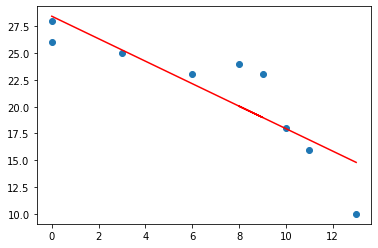

In [43]:
# Plot regression
plt.scatter(x,y)
yhat = [solution[B0] + solution[B1]*xi for xi in x]
plt.plot(x,yhat,color='red')

In [26]:
# Check using least-squares
A = np.ones([9,2])
A[:,1] = x

B = np.zeros([9,1])
B[:,0] = y

solution = np.linalg.lstsq(A,B,rcond=0)[0]

[[28.43209877]
 [-1.04814815]]


By using MLE to calculate the parameters that minimize $\sum_{i=1}^n{(y_i-\hat{y}_i)^2}$, we can find a linear regression fit for our data. The solution is the same as the least-squares problem. 

